In [18]:
! pip install cmapPy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cmapPy.pandasGEXpress.parse as pg

In [32]:
# 1

def read_gct_to_dataframe(file_path, summary=False):
    """
    Read GCT file into Pandas DataFrames

    :param str file_path: file path to GenePattern GCT file
    :param boolean summary: whether to print # of rows and cols imported (default False)
    :return: GCToo object containing 3 component dataframes (row_metadata_df, column_metadata_df, and data_df) & a multi-index df that assembles these components
    """ 
    # Note: exception handling to validate file path's extension and file format is implemented in the cmapPy parse method
    
    # create GCToo object that reads the GCT file into Pandas DataFrames 
    gctoo = pg.parse(file_path)
    # If summary parameter is passed and True: print # of rows and cols imported, accessed via GCToo's dimension property
    if summary:
        print(str(gctoo.data_df.shape[0]) + " rows imported, " + str(gctoo.data_df.shape[1]) + " columns imported")
    # return gctoo.data_df # if want to discard metadata
    return gctoo

In [20]:
# 2a
min_file_gctoo = read_gct_to_dataframe("BRCA_minimal_60x19.gct", True)

60 rows imported, 19 columns imported


In [21]:
# 2b
large_file_gctoo = read_gct_to_dataframe("BRCA_large_20783x40.gct")

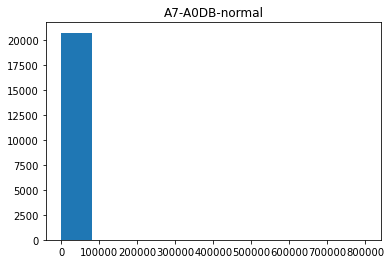

Largest value: 800572.0


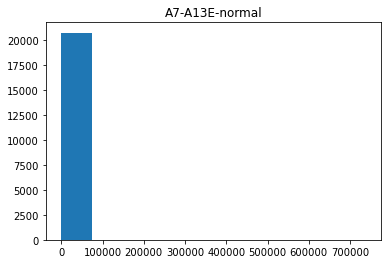

Largest value: 737860.0


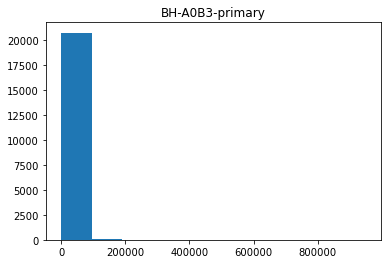

Largest value: 949783.0


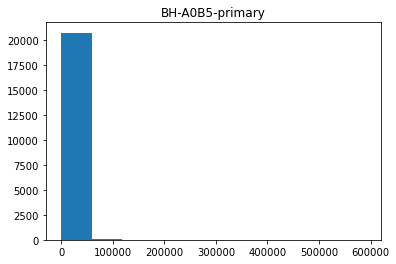

Largest value: 590476.0


In [31]:
# 3 

# string array containing names of DataFrame columns that correspond to samples of interest
selected_cols = ['A7-A0DB-normal', 'A7-A13E-normal', 'BH-A0B3-primary', 'BH-A0B5-primary']

# from GCToo object, select DataFrame with file's primary data (non-metadata df)
df = large_file_gctoo.data_df

# for each sample of interest
for sample in selected_cols:
    plt.hist(df[sample].to_numpy().flatten()) # transform corresponding DataFrame col into 1D array
    plt.title(sample)
    plt.show() # plot as labelled histogram
    # print("Largest value: " + str(df[sample].max())) # upper-bound value as sanity check for histogram scaling

In [23]:
# 4

# new DataFrame -- DataFrame subset containing only relevant samples
df_selected = df[selected_cols]

# print new DataFrame, populated with central tendency and spread calculations
df_summary = pd.DataFrame({'Sample name': selected_cols, 'Mean': df_selected.mean(), 'Median': df_selected.median(), 'Standard deviation': df_selected.std()})
print(df_summary)


                     Sample name         Mean  Median  Standard deviation
cid                                                                      
A7-A0DB-normal    A7-A0DB-normal  2354.671875   362.0        13974.258789
A7-A13E-normal    A7-A13E-normal  2380.711670   427.0        13373.207031
BH-A0B3-primary  BH-A0B3-primary  2899.006592   532.0        14902.516602
BH-A0B5-primary  BH-A0B5-primary  2852.139404   688.0        10703.133789


In [24]:
# 5a

# find max value in each row of DataFrame
df['max_value'] = df.max(axis=1)

# create new DataFrame, filtering out rows with max value under 500
df_filtered = df.loc[df['max_value'] >= 500]

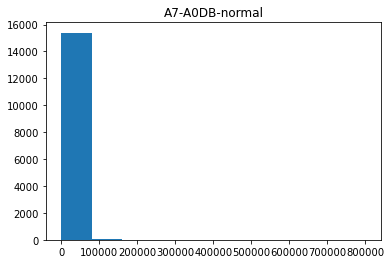

Mean: 3154.412841796875, median: 873.0


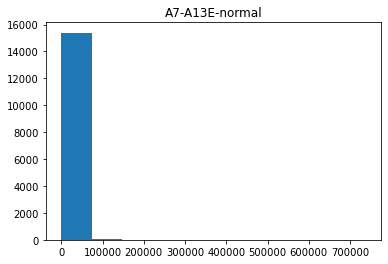

Mean: 3189.294921875, median: 964.0


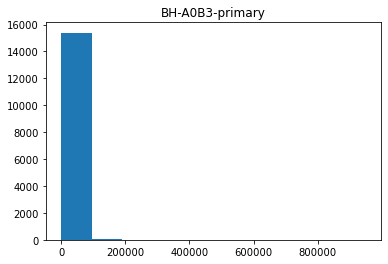

Mean: 3884.052734375, median: 1188.0


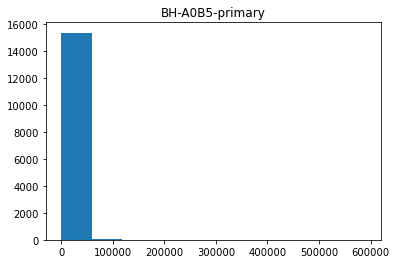

Mean: 3818.022705078125, median: 1491.0


In [27]:
# 5b

# for each sample of interest
for sample in selected_cols:
    plt.hist(df_filtered[sample].to_numpy().flatten()) # transform corresponding DataFrame col into 1D array
    plt.title(sample)
    plt.show() # plot as labelled histogram
    print("Mean: " + str(df_filtered[sample].mean()) + ", median: " + str(df_filtered[sample].median()))